In [29]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter

In [59]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM,MLPClassifier
from xgboost import XGBClassifier,XGBRegressor


In [13]:
from sklearn.model_selection import train_test_split,KFold
from sklearn import model_selection

In [6]:
df1=pd.read_csv('3_ITSM_cleansed_Encoded_Engineered.csv')
df1.head()

,c_CI_Cat,c_Closure_Code,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,t_ReopenFlag,t_TicketWIPDurationDays,y_Priority
0,11,4,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,0,638.013194,3
1,1,6,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,1,629.869444,2
2,1,3,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,0,484.904167,3
3,1,4,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,0,455.120833,3
4,1,4,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,0,455.102083,3


In [20]:
CatVarList = ['c_CI_Cat', 'c_Closure_Code','t_ReopenFlag']
ConVarList = ['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
DatVarList = ['t_Close_Time', 't_Open_Time']
OutValList = ['y_Priority']

X_All_1 = ['c_CI_Cat', 'c_Closure_Code','t_ReopenFlag',
           'q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
           

In [21]:
X1 = df1[X_All_1]
y1 = df1[OutValList]

In [26]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=10,test_size=.2)

In [27]:
models=[]
models.append(('RF',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('tree',DecisionTreeClassifier()))
models.append(('XGB_gbtree', XGBClassifier(booster='gbtree')))
models.append(('XGB_dart', XGBClassifier(booster='dart')))
models.append(('SVM', SVC()))
models.append(('ANN', MLPClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [28]:
seed = 10
results = []
names = []
output = []
score = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
for name, model in models:
    cv_results = model_selection.cross_val_score(model,np.array(X1_train),np.array(y1_train),cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    output.append(msg)
    print(output)
    
print(output)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

['RF: 0.619856 (0.009550)']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)']
['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)', 'XGB_gbtree: 0.688799 (0.010184)']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed w

['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)', 'ANN: 0.672199 (0.011177)']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)', 'ANN: 0.672199 (0.011177)', 'GBC: 0.690891 (0.010497)']
['RF: 0.619856 (0.009550)', 'KNN: 0.649707 (0.010001)', 'tree: 0.603082 (0.007676)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)', 'ANN: 0.672199 (0.011177)', 'GBC: 0.690891 (0.010497)']


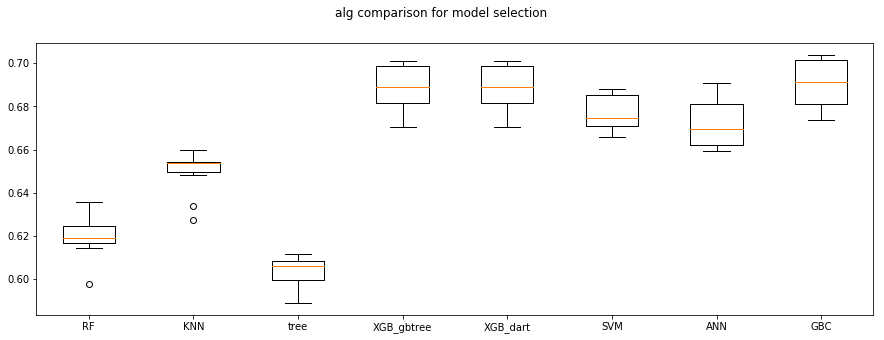

In [34]:
rcParams['figure.figsize']=15,5
fig=plt.figure()
fig.suptitle('alg comparison for model selection')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler


In [51]:
scaler=StandardScaler()
scaler.fit(X1_train[ConVarList])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters={'learning rate':[.1],
           'max_depth':[8],
             "min_child_weight" : [5],
          
           'gamma':[.1],
           'colsample_bytree':[.8],
           'scoring':['recall']
           }


In [69]:
!pip install xgboost
from xgboost import XGBClassifier


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [68]:
!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\Users\user\Anaconda3\python.exe -m pip install --upgrade pip
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [75]:
model=XGBClassifier()
grid_model_XGB=GridSearchCV(model,parameters)

In [76]:
grid_model_XGB.fit(X1_train, y1_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning rate': [0.1], 'max_depth': [8], 'min_child_weight': [5], 'gamma': [0.1], 'colsample_bytree': [0.8], 'scoring': ['recall']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
grid_model_XGB.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 5,
 'scoring': 'recall'}

In [79]:
grid_model_XGB.best_score_

0.6935067652392244

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [84]:
y_predict=grid_model_XGB.predict(X1_test)

In [86]:
accuracy_score(y1_test,y_predict)*100

68.81450488145049

In [87]:
confusion_matrix(y1_test,y_predict)

array([[   8,   12,   39,   24],
       [   5,  296,  715,   66],
       [   3,   66, 4129,  146],
       [   2,   29, 1129,  501]], dtype=int64)